# Attention : 
# Faire "File -> Save a copy in Drive" avant de commencer à modifier le notebook, sinon vos modifications ne seront pas sauvegardées.


In [44]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
!unzip -j TP3-4.zip

--2020-10-28 17:14:20--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
Résolution de webia.lip6.fr (webia.lip6.fr)… 132.227.201.33
Connexion à webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 13421167 (13M) [application/zip]
Enregistre : «TP3-4.zip»

TP3-4.zip           100%[===================>]  12,80M  1,76MB/s    ds 10s     

2020-10-28 17:14:30 (1,24 MB/s) - «TP3-4.zip» enregistré [13421167/13421167]

Archive:  TP3-4.zip
  inflating: tme5.py                 
  inflating: mnist.mat               
  inflating: circles.py              
  inflating: circles.mat             


In [323]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'tme5.py'

# Partie 1 : Forward et Backward manuels

In [324]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres Wh, Wy, bh, by
    
    params["Wh"] = torch.randn((nx,nh), dtype=torch.float)
    params["Wy"] = torch.randn((nh,ny), dtype=torch.float)
    params["bh"] = torch.randn((nh), dtype=torch.float)
    params["by"] = torch.randn((ny), dtype=torch.float)
    
    ####################
    ##      FIN        #
    ####################
    return params

In [325]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(1)
    ny = params['Wy'].size(1)
    outputs = {}

    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres X, htilde, h, ytilde, yhat
    #
    outputs["X"] = X
    outputs["htilde"] = torch.mm(X,params["Wh"]) + params["bh"] # Linear
    outputs["h"] = torch.tanh(outputs["htilde"]) # activation
    outputs["ytilde"] = torch.mm(outputs["h"],params["Wy"]) + params["by"] # Linear
    #import ipdb;ipdb.set_trace()
    outputs["yhat"] = torch.div(torch.exp(outputs["ytilde"]),torch.sum(torch.exp(outputs["ytilde"]),1).repeat(ny,1).T) # Softmax
    
    ####################
    ##      FIN        #
    ####################

    return outputs["yhat"], outputs

In [326]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Votre code ici  ##
    #####################

    L = 0
    acc = 0
    batch_size = float(Yhat.size(0))
    
    _, indsY = torch.max(Y, 1) # classes à prédire
    _, indsYhat = torch.max(Yhat, 1) # classes prédites
    
    correct = float(torch.sum(indsY == indsYhat))
    
    #import ipdb;ipdb.set_trace()
    acc = correct/batch_size
    L = -torch.mean(torch.sum(torch.log(Yhat)*Y,1))
    ####################
    ##      FIN        #
    ####################

    return L, acc

In [215]:
a = torch.tensor([[0.9,0.1],[0.1,0.9],[0.9,0.1]])
b = torch.tensor([[1,0],[1,0],[0,1]])
-torch.mean(torch.sum(torch.log(a)*b,1))

tensor(1.5702)

In [327]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres Wy, Wh, by, bh
        
    grads["ytilde"] = (outputs["yhat"]-Y)/bsize
    grads["Wy"] = torch.matmul(outputs["h"].T,grads["ytilde"])
    grads["h"] = torch.matmul(grads["ytilde"],params["Wy"].T)
    grads["Wh"] = torch.matmul(outputs["X"].T,grads["htilde"])
    grads["by"] = grads["ytilde"].sum(0)
    grads["bh"] = grads["htilde"].sum(0)
    
    ####################
    ##      FIN        #
    ####################
    return grads

In [328]:
def sgd(params, grads, eta):

    #####################
    ## Votre code ici  ##
    #####################
    # mettre à jour le contenu de params

    params["Wh"] = params["Wh"] - eta*grads["Wh"]
    params["Wy"] = params["Wy"] - eta*grads["Wy"]
    params["bh"] = params["bh"] - eta*grads["bh"]
    params["by"] = params["by"] - eta*grads["by"]

    ####################
    ##      FIN        #
    ####################
    return params

## Algorithme global d'apprentissage (manuel)

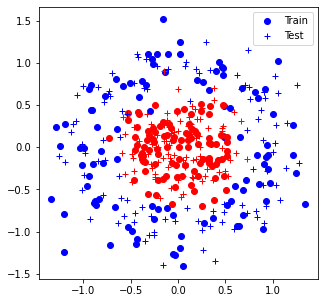

Iter 0: Acc train 0.6% (0.71), acc test 0.6% (0.70)


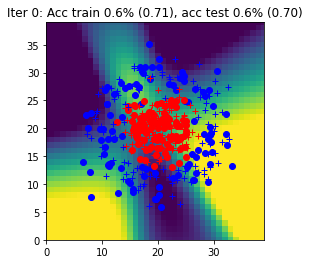

Iter 1: Acc train 0.6% (0.71), acc test 0.6% (0.70)
Iter 2: Acc train 0.6% (0.70), acc test 0.6% (0.70)
Iter 3: Acc train 0.6% (0.70), acc test 0.6% (0.69)
Iter 4: Acc train 0.6% (0.70), acc test 0.6% (0.69)
Iter 5: Acc train 0.6% (0.70), acc test 0.6% (0.69)
Iter 6: Acc train 0.6% (0.69), acc test 0.6% (0.69)
Iter 7: Acc train 0.6% (0.69), acc test 0.6% (0.68)
Iter 8: Acc train 0.6% (0.69), acc test 0.6% (0.68)
Iter 9: Acc train 0.6% (0.69), acc test 0.6% (0.68)
Iter 10: Acc train 0.6% (0.69), acc test 0.6% (0.68)
Iter 11: Acc train 0.6% (0.69), acc test 0.6% (0.68)
Iter 12: Acc train 0.6% (0.68), acc test 0.6% (0.67)
Iter 13: Acc train 0.6% (0.68), acc test 0.6% (0.67)
Iter 14: Acc train 0.6% (0.68), acc test 0.6% (0.66)
Iter 15: Acc train 0.6% (0.68), acc test 0.6% (0.67)
Iter 16: Acc train 0.6% (0.68), acc test 0.6% (0.66)
Iter 17: Acc train 0.6% (0.67), acc test 0.7% (0.66)
Iter 18: Acc train 0.6% (0.67), acc test 0.6% (0.66)
Iter 19: Acc train 0.6% (0.67), acc test 0.7% (0.65)
It

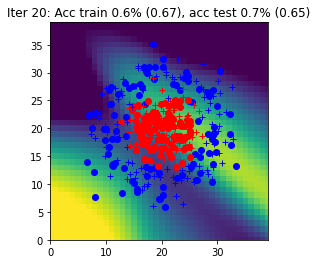

Iter 21: Acc train 0.6% (0.66), acc test 0.7% (0.65)
Iter 22: Acc train 0.6% (0.66), acc test 0.7% (0.65)
Iter 23: Acc train 0.6% (0.66), acc test 0.7% (0.64)
Iter 24: Acc train 0.6% (0.66), acc test 0.7% (0.64)
Iter 25: Acc train 0.6% (0.65), acc test 0.7% (0.64)
Iter 26: Acc train 0.6% (0.65), acc test 0.7% (0.64)
Iter 27: Acc train 0.6% (0.65), acc test 0.7% (0.63)
Iter 28: Acc train 0.6% (0.65), acc test 0.7% (0.63)
Iter 29: Acc train 0.6% (0.65), acc test 0.7% (0.63)
Iter 30: Acc train 0.6% (0.65), acc test 0.6% (0.63)
Iter 31: Acc train 0.6% (0.65), acc test 0.7% (0.63)
Iter 32: Acc train 0.6% (0.64), acc test 0.7% (0.62)
Iter 33: Acc train 0.6% (0.64), acc test 0.7% (0.62)
Iter 34: Acc train 0.6% (0.64), acc test 0.7% (0.62)
Iter 35: Acc train 0.6% (0.64), acc test 0.7% (0.62)
Iter 36: Acc train 0.6% (0.64), acc test 0.7% (0.62)
Iter 37: Acc train 0.7% (0.64), acc test 0.7% (0.62)
Iter 38: Acc train 0.7% (0.64), acc test 0.7% (0.62)
Iter 39: Acc train 0.7% (0.64), acc test 0.7% 

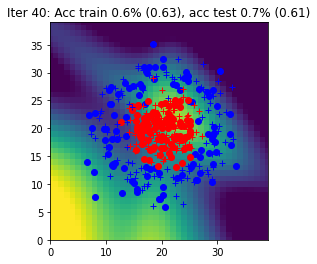

Iter 41: Acc train 0.6% (0.63), acc test 0.7% (0.61)
Iter 42: Acc train 0.6% (0.63), acc test 0.8% (0.61)
Iter 43: Acc train 0.6% (0.63), acc test 0.7% (0.61)
Iter 44: Acc train 0.7% (0.63), acc test 0.8% (0.61)
Iter 45: Acc train 0.7% (0.63), acc test 0.8% (0.61)
Iter 46: Acc train 0.7% (0.63), acc test 0.8% (0.61)
Iter 47: Acc train 0.7% (0.63), acc test 0.7% (0.61)
Iter 48: Acc train 0.7% (0.63), acc test 0.8% (0.61)
Iter 49: Acc train 0.7% (0.63), acc test 0.8% (0.61)
Iter 50: Acc train 0.7% (0.63), acc test 0.8% (0.61)
Iter 51: Acc train 0.7% (0.63), acc test 0.8% (0.60)
Iter 52: Acc train 0.7% (0.63), acc test 0.7% (0.61)
Iter 53: Acc train 0.7% (0.63), acc test 0.8% (0.60)
Iter 54: Acc train 0.7% (0.62), acc test 0.8% (0.60)
Iter 55: Acc train 0.7% (0.62), acc test 0.8% (0.60)
Iter 56: Acc train 0.7% (0.62), acc test 0.8% (0.60)
Iter 57: Acc train 0.7% (0.63), acc test 0.8% (0.60)
Iter 58: Acc train 0.7% (0.62), acc test 0.8% (0.60)
Iter 59: Acc train 0.7% (0.62), acc test 0.8% 

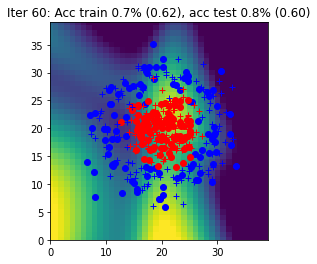

Iter 61: Acc train 0.7% (0.62), acc test 0.8% (0.60)
Iter 62: Acc train 0.7% (0.63), acc test 0.8% (0.60)
Iter 63: Acc train 0.7% (0.62), acc test 0.8% (0.60)
Iter 64: Acc train 0.7% (0.62), acc test 0.8% (0.60)
Iter 65: Acc train 0.7% (0.62), acc test 0.7% (0.60)
Iter 66: Acc train 0.7% (0.63), acc test 0.7% (0.60)
Iter 67: Acc train 0.7% (0.62), acc test 0.7% (0.60)
Iter 68: Acc train 0.7% (0.62), acc test 0.8% (0.59)
Iter 69: Acc train 0.7% (0.62), acc test 0.8% (0.59)
Iter 70: Acc train 0.7% (0.62), acc test 0.8% (0.59)
Iter 71: Acc train 0.7% (0.62), acc test 0.8% (0.59)
Iter 72: Acc train 0.7% (0.62), acc test 0.8% (0.59)
Iter 73: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 74: Acc train 0.7% (0.62), acc test 0.8% (0.59)
Iter 75: Acc train 0.7% (0.62), acc test 0.8% (0.59)
Iter 76: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 77: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 78: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 79: Acc train 0.7% (0.61), acc test 0.8% 

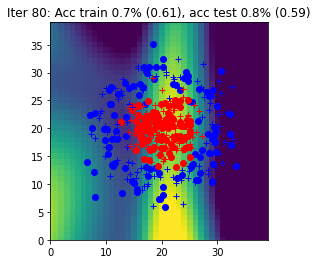

Iter 81: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 82: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 83: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 84: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 85: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 86: Acc train 0.7% (0.61), acc test 0.8% (0.59)
Iter 87: Acc train 0.7% (0.61), acc test 0.8% (0.58)
Iter 88: Acc train 0.7% (0.61), acc test 0.8% (0.58)
Iter 89: Acc train 0.7% (0.61), acc test 0.8% (0.58)
Iter 90: Acc train 0.7% (0.61), acc test 0.8% (0.58)
Iter 91: Acc train 0.7% (0.61), acc test 0.8% (0.58)
Iter 92: Acc train 0.7% (0.60), acc test 0.8% (0.58)
Iter 93: Acc train 0.7% (0.60), acc test 0.8% (0.58)
Iter 94: Acc train 0.7% (0.61), acc test 0.8% (0.58)
Iter 95: Acc train 0.7% (0.60), acc test 0.8% (0.58)
Iter 96: Acc train 0.7% (0.60), acc test 0.8% (0.58)
Iter 97: Acc train 0.7% (0.60), acc test 0.8% (0.58)
Iter 98: Acc train 0.7% (0.60), acc test 0.8% (0.57)
Iter 99: Acc train 0.7% (0.60), acc test 0.8% 

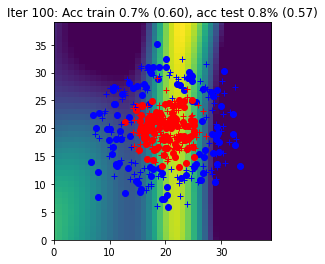

Iter 101: Acc train 0.7% (0.60), acc test 0.8% (0.57)
Iter 102: Acc train 0.7% (0.60), acc test 0.8% (0.57)
Iter 103: Acc train 0.7% (0.60), acc test 0.8% (0.57)
Iter 104: Acc train 0.7% (0.60), acc test 0.8% (0.57)
Iter 105: Acc train 0.7% (0.60), acc test 0.8% (0.57)
Iter 106: Acc train 0.7% (0.60), acc test 0.8% (0.57)
Iter 107: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 108: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 109: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 110: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 111: Acc train 0.7% (0.60), acc test 0.7% (0.57)
Iter 112: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 113: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 114: Acc train 0.7% (0.59), acc test 0.8% (0.56)
Iter 115: Acc train 0.7% (0.59), acc test 0.8% (0.56)
Iter 116: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 117: Acc train 0.7% (0.59), acc test 0.7% (0.57)
Iter 118: Acc train 0.7% (0.59), acc test 0.7% (0.57)
Iter 119: Acc train 0.7% (0.

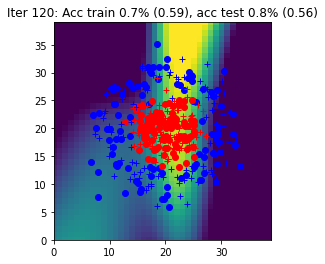

Iter 121: Acc train 0.7% (0.59), acc test 0.8% (0.56)
Iter 122: Acc train 0.7% (0.58), acc test 0.8% (0.56)
Iter 123: Acc train 0.7% (0.58), acc test 0.8% (0.56)
Iter 124: Acc train 0.7% (0.59), acc test 0.8% (0.57)
Iter 125: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 126: Acc train 0.7% (0.59), acc test 0.8% (0.56)
Iter 127: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 128: Acc train 0.7% (0.59), acc test 0.8% (0.56)
Iter 129: Acc train 0.7% (0.58), acc test 0.8% (0.56)
Iter 130: Acc train 0.7% (0.58), acc test 0.8% (0.56)
Iter 131: Acc train 0.7% (0.58), acc test 0.8% (0.56)
Iter 132: Acc train 0.7% (0.58), acc test 0.8% (0.56)
Iter 133: Acc train 0.7% (0.58), acc test 0.8% (0.56)
Iter 134: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 135: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 136: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 137: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 138: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 139: Acc train 0.8% (0.

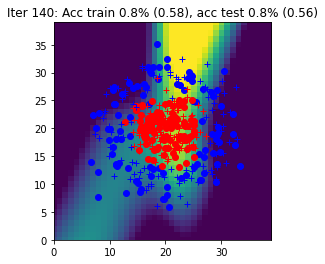

Iter 141: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 142: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 143: Acc train 0.7% (0.58), acc test 0.8% (0.57)
Iter 144: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 145: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 146: Acc train 0.8% (0.58), acc test 0.8% (0.56)
Iter 147: Acc train 0.8% (0.57), acc test 0.8% (0.55)
Iter 148: Acc train 0.8% (0.57), acc test 0.8% (0.56)
Iter 149: Acc train 0.8% (0.57), acc test 0.8% (0.56)


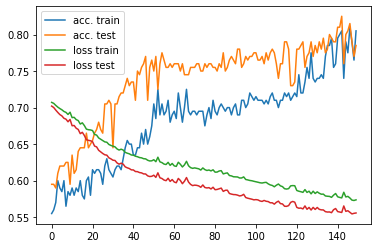

In [329]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant les fonctions forward, loss_accuracy, backward, sgd 
        _, out = forward(params, X)
        loss, acc = loss_accuracy(out["yhat"], Y)
        gradients = backward(params, out, Y)
        sgd(params, gradients, eta)
    ####################
    ##      FIN        #
    ####################
    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration,acctrain, Ltrain, acctest, Ltest)
    print(title)
    if iteration % 20 == 0:
        data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 2 : Simplification du backward avec `torch.autograd`



In [330]:
def init_params_1(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres Wh, Wy, bh, by
    # activer l'autograd sur les poids du réseau
    
    params["Wh"] = torch.randn((nx,nh),requires_grad = True, dtype=torch.float)
    params["Wy"] = torch.randn((nh,ny),requires_grad = True, dtype=torch.float)
    params["bh"] = torch.randn((nh),requires_grad = True, dtype=torch.float)
    params["by"] = torch.randn((ny),requires_grad = True, dtype=torch.float)
    
    ####################
    ##      FIN        #
    ####################
    return params

La fonction `forward` est inchangée par rapport à la partie précédente. 

La fonction `backward` n'est plus utilisée grâce à l'autograd. 

In [331]:
def sgd_1(params, eta):

    #####################
    ## Votre code ici  ##
    #####################
    # mettre à jour le contenu de params
    # attention à bien utiliser torch.no_grad()
    # et à remettre les accumulateurs de gradients à zéro
    with torch.no_grad():
        params["Wh"] -= eta*params["Wh"].grad
        params["Wy"] -= eta*params["Wy"].grad
        params["bh"] -= eta*params["bh"].grad
        params["by"] -= eta*params["by"].grad

    params["Wh"].grad.data.zero_()
    params["Wy"].grad.data.zero_()  
    params["bh"].grad.data.zero_()  
    params["by"].grad.data.zero_()  

    ####################
    ##      FIN        #
    ####################
    return params

## Algorithme global d'apprentissage (avec autograd)

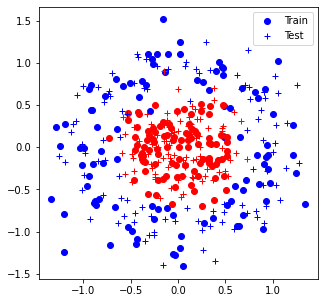

Iter 0: Acc train 0.5% (1.06), acc test 0.5% (1.04)


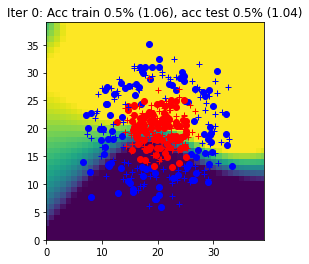

Iter 1: Acc train 0.5% (0.97), acc test 0.5% (0.94)
Iter 2: Acc train 0.5% (0.89), acc test 0.5% (0.87)
Iter 3: Acc train 0.5% (0.82), acc test 0.5% (0.80)
Iter 4: Acc train 0.5% (0.76), acc test 0.5% (0.74)
Iter 5: Acc train 0.5% (0.72), acc test 0.5% (0.70)
Iter 6: Acc train 0.6% (0.68), acc test 0.6% (0.66)
Iter 7: Acc train 0.6% (0.65), acc test 0.6% (0.64)
Iter 8: Acc train 0.6% (0.63), acc test 0.7% (0.62)
Iter 9: Acc train 0.7% (0.61), acc test 0.7% (0.60)
Iter 10: Acc train 0.7% (0.60), acc test 0.8% (0.59)
Iter 11: Acc train 0.7% (0.58), acc test 0.8% (0.57)
Iter 12: Acc train 0.8% (0.57), acc test 0.8% (0.56)
Iter 13: Acc train 0.8% (0.56), acc test 0.8% (0.56)
Iter 14: Acc train 0.8% (0.55), acc test 0.8% (0.55)
Iter 15: Acc train 0.8% (0.55), acc test 0.8% (0.54)
Iter 16: Acc train 0.8% (0.54), acc test 0.8% (0.53)
Iter 17: Acc train 0.8% (0.53), acc test 0.8% (0.53)
Iter 18: Acc train 0.8% (0.53), acc test 0.8% (0.52)
Iter 19: Acc train 0.8% (0.52), acc test 0.9% (0.52)
It

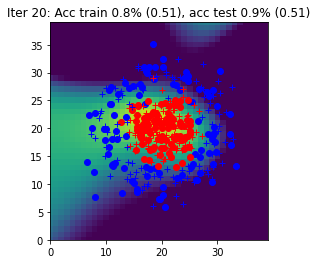

Iter 21: Acc train 0.8% (0.51), acc test 0.9% (0.51)
Iter 22: Acc train 0.8% (0.50), acc test 0.9% (0.50)
Iter 23: Acc train 0.9% (0.50), acc test 0.9% (0.49)
Iter 24: Acc train 0.9% (0.49), acc test 0.9% (0.49)
Iter 25: Acc train 0.9% (0.49), acc test 0.9% (0.48)
Iter 26: Acc train 0.9% (0.48), acc test 0.9% (0.48)
Iter 27: Acc train 0.9% (0.48), acc test 0.9% (0.47)
Iter 28: Acc train 0.9% (0.47), acc test 0.9% (0.47)
Iter 29: Acc train 0.9% (0.47), acc test 0.9% (0.47)
Iter 30: Acc train 0.9% (0.46), acc test 0.9% (0.46)
Iter 31: Acc train 0.9% (0.46), acc test 0.9% (0.46)
Iter 32: Acc train 0.9% (0.45), acc test 0.9% (0.45)
Iter 33: Acc train 0.9% (0.45), acc test 0.9% (0.45)
Iter 34: Acc train 0.9% (0.44), acc test 0.9% (0.44)
Iter 35: Acc train 0.9% (0.44), acc test 0.9% (0.44)
Iter 36: Acc train 0.9% (0.44), acc test 0.9% (0.44)
Iter 37: Acc train 0.9% (0.43), acc test 0.9% (0.43)
Iter 38: Acc train 0.9% (0.43), acc test 0.9% (0.43)
Iter 39: Acc train 0.9% (0.42), acc test 0.9% 

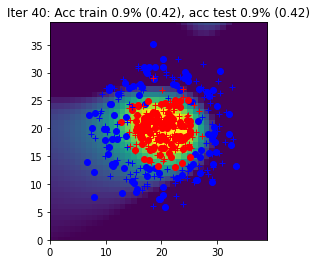

Iter 41: Acc train 0.9% (0.42), acc test 0.9% (0.42)
Iter 42: Acc train 0.9% (0.41), acc test 0.9% (0.41)
Iter 43: Acc train 0.9% (0.41), acc test 0.9% (0.41)
Iter 44: Acc train 0.9% (0.41), acc test 0.9% (0.41)
Iter 45: Acc train 0.9% (0.40), acc test 0.9% (0.40)
Iter 46: Acc train 0.9% (0.40), acc test 0.9% (0.40)
Iter 47: Acc train 0.9% (0.40), acc test 0.9% (0.40)
Iter 48: Acc train 0.9% (0.39), acc test 0.9% (0.39)
Iter 49: Acc train 0.9% (0.39), acc test 0.9% (0.39)
Iter 50: Acc train 0.9% (0.39), acc test 0.9% (0.39)
Iter 51: Acc train 0.9% (0.38), acc test 0.9% (0.39)
Iter 52: Acc train 0.9% (0.38), acc test 0.9% (0.38)
Iter 53: Acc train 1.0% (0.38), acc test 0.9% (0.38)
Iter 54: Acc train 1.0% (0.37), acc test 0.9% (0.38)
Iter 55: Acc train 1.0% (0.37), acc test 0.9% (0.37)
Iter 56: Acc train 1.0% (0.37), acc test 0.9% (0.37)
Iter 57: Acc train 1.0% (0.37), acc test 0.9% (0.37)
Iter 58: Acc train 1.0% (0.36), acc test 0.9% (0.37)
Iter 59: Acc train 1.0% (0.36), acc test 0.9% 

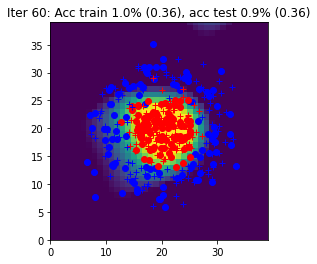

Iter 61: Acc train 1.0% (0.36), acc test 0.9% (0.36)
Iter 62: Acc train 1.0% (0.35), acc test 0.9% (0.36)
Iter 63: Acc train 1.0% (0.35), acc test 0.9% (0.35)
Iter 64: Acc train 1.0% (0.35), acc test 0.9% (0.35)
Iter 65: Acc train 1.0% (0.35), acc test 0.9% (0.35)
Iter 66: Acc train 1.0% (0.34), acc test 0.9% (0.35)
Iter 67: Acc train 1.0% (0.34), acc test 0.9% (0.35)
Iter 68: Acc train 1.0% (0.34), acc test 0.9% (0.34)
Iter 69: Acc train 1.0% (0.34), acc test 0.9% (0.34)
Iter 70: Acc train 1.0% (0.33), acc test 0.9% (0.34)
Iter 71: Acc train 1.0% (0.33), acc test 0.9% (0.34)
Iter 72: Acc train 1.0% (0.33), acc test 0.9% (0.34)
Iter 73: Acc train 1.0% (0.33), acc test 0.9% (0.33)
Iter 74: Acc train 1.0% (0.33), acc test 0.9% (0.33)
Iter 75: Acc train 1.0% (0.32), acc test 0.9% (0.33)
Iter 76: Acc train 1.0% (0.32), acc test 0.9% (0.33)
Iter 77: Acc train 1.0% (0.32), acc test 0.9% (0.33)
Iter 78: Acc train 1.0% (0.32), acc test 0.9% (0.32)
Iter 79: Acc train 1.0% (0.32), acc test 0.9% 

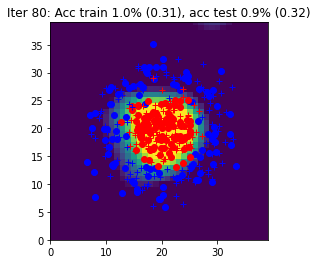

Iter 81: Acc train 1.0% (0.31), acc test 0.9% (0.32)
Iter 82: Acc train 1.0% (0.31), acc test 0.9% (0.32)
Iter 83: Acc train 1.0% (0.31), acc test 0.9% (0.32)
Iter 84: Acc train 1.0% (0.31), acc test 0.9% (0.31)
Iter 85: Acc train 0.9% (0.31), acc test 0.9% (0.31)
Iter 86: Acc train 0.9% (0.30), acc test 0.9% (0.31)
Iter 87: Acc train 0.9% (0.30), acc test 0.9% (0.31)
Iter 88: Acc train 0.9% (0.30), acc test 0.9% (0.31)
Iter 89: Acc train 0.9% (0.30), acc test 0.9% (0.31)
Iter 90: Acc train 0.9% (0.30), acc test 0.9% (0.31)
Iter 91: Acc train 0.9% (0.30), acc test 0.9% (0.30)
Iter 92: Acc train 0.9% (0.29), acc test 0.9% (0.30)
Iter 93: Acc train 0.9% (0.29), acc test 0.9% (0.30)
Iter 94: Acc train 0.9% (0.29), acc test 0.9% (0.30)
Iter 95: Acc train 0.9% (0.29), acc test 0.9% (0.30)
Iter 96: Acc train 0.9% (0.29), acc test 0.9% (0.30)
Iter 97: Acc train 0.9% (0.29), acc test 0.9% (0.30)
Iter 98: Acc train 0.9% (0.28), acc test 0.9% (0.29)
Iter 99: Acc train 0.9% (0.28), acc test 0.9% 

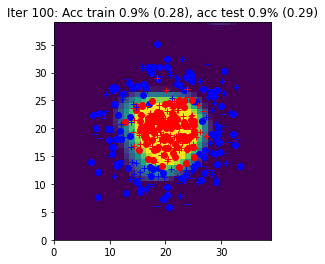

Iter 101: Acc train 0.9% (0.28), acc test 0.9% (0.29)
Iter 102: Acc train 0.9% (0.28), acc test 0.9% (0.29)
Iter 103: Acc train 0.9% (0.28), acc test 0.9% (0.29)
Iter 104: Acc train 0.9% (0.28), acc test 0.9% (0.29)
Iter 105: Acc train 0.9% (0.28), acc test 0.9% (0.29)
Iter 106: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 107: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 108: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 109: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 110: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 111: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 112: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 113: Acc train 0.9% (0.27), acc test 0.9% (0.28)
Iter 114: Acc train 0.9% (0.26), acc test 0.9% (0.28)
Iter 115: Acc train 0.9% (0.26), acc test 0.9% (0.27)
Iter 116: Acc train 0.9% (0.26), acc test 0.9% (0.27)
Iter 117: Acc train 0.9% (0.26), acc test 0.9% (0.27)
Iter 118: Acc train 0.9% (0.26), acc test 0.9% (0.27)
Iter 119: Acc train 0.9% (0.

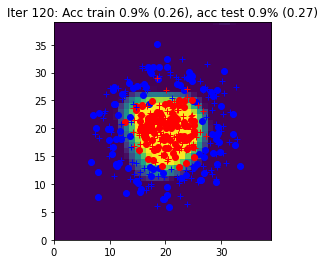

Iter 121: Acc train 0.9% (0.26), acc test 0.9% (0.27)
Iter 122: Acc train 0.9% (0.25), acc test 0.9% (0.27)
Iter 123: Acc train 0.9% (0.25), acc test 0.9% (0.27)
Iter 124: Acc train 0.9% (0.25), acc test 0.9% (0.27)
Iter 125: Acc train 0.9% (0.25), acc test 0.9% (0.26)
Iter 126: Acc train 0.9% (0.25), acc test 0.9% (0.26)
Iter 127: Acc train 0.9% (0.25), acc test 0.9% (0.26)
Iter 128: Acc train 0.9% (0.25), acc test 0.9% (0.26)
Iter 129: Acc train 0.9% (0.25), acc test 0.9% (0.26)
Iter 130: Acc train 0.9% (0.25), acc test 0.9% (0.26)
Iter 131: Acc train 0.9% (0.25), acc test 0.9% (0.26)
Iter 132: Acc train 0.9% (0.24), acc test 0.9% (0.26)
Iter 133: Acc train 0.9% (0.24), acc test 0.9% (0.26)
Iter 134: Acc train 0.9% (0.24), acc test 0.9% (0.26)
Iter 135: Acc train 0.9% (0.24), acc test 0.9% (0.25)
Iter 136: Acc train 0.9% (0.24), acc test 0.9% (0.25)
Iter 137: Acc train 0.9% (0.24), acc test 0.9% (0.25)
Iter 138: Acc train 0.9% (0.24), acc test 0.9% (0.25)
Iter 139: Acc train 0.9% (0.

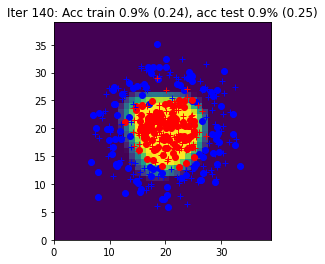

Iter 141: Acc train 0.9% (0.24), acc test 0.9% (0.25)
Iter 142: Acc train 0.9% (0.24), acc test 0.9% (0.25)
Iter 143: Acc train 0.9% (0.23), acc test 0.9% (0.25)
Iter 144: Acc train 0.9% (0.23), acc test 0.9% (0.25)
Iter 145: Acc train 0.9% (0.23), acc test 0.9% (0.25)
Iter 146: Acc train 0.9% (0.23), acc test 0.9% (0.25)
Iter 147: Acc train 0.9% (0.23), acc test 0.9% (0.25)
Iter 148: Acc train 0.9% (0.23), acc test 0.9% (0.24)
Iter 149: Acc train 0.9% (0.23), acc test 0.9% (0.24)


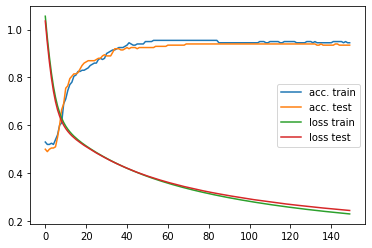

In [332]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.01

params = init_params_1(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant les fonctions forward, loss_accuracy, sgd 
        # calculer les gradients avec la fonction backward de l'autograd 

        _, out = forward(params, X)
        loss, acc = loss_accuracy(out["yhat"], Y)
        loss.backward()
        sgd_1(params, eta)

    ####################
    ##      FIN        #
    ####################
    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # detach() est utilisé pour détacher les predictions du graphes de calcul autograd
    if iteration % 20 == 0:
        data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 3 : Simplification du forward avec `torch.nn`

`init_params` et `forward` sont supprimés et remplacés par une fonction `init_model` qui déclare l'architecture du modèle et la loss.

In [288]:
def init_model(nx, nh, ny):

    #####################
    ## Votre code ici  ##
    #####################

    model = torch.nn.Sequential(
                torch.nn.Linear(nx,nh, bias=True),
                torch.nn.Tanh(),
                torch.nn.Linear(nh,ny, bias=True)
    )
    loss = torch.nn.CrossEntropyLoss()

    ####################
    ##      FIN        #
    ####################

    return model, loss

In [296]:
def loss_accuracy_2(loss, Yhat, Y):

    #####################
    ## Votre code ici  ##
    #####################
    # faire appel à la fonction de loss
    #import ipdb;ipdb.set_trace()
    _, indsY = torch.max(Y, 1) # classes à prédire
    _, indsYhat = torch.max(Yhat, 1) # classes prédites
    L = loss(Yhat,torch.argmax(Y,1))
    correct = float(torch.sum(indsY == indsYhat))
    acc = correct/len(Y)
    ####################
    ##      FIN        #
    ####################

    return L, acc

In [297]:
def sgd_2(model, eta):

    #####################
    ## Votre code ici  ##
    #####################
    # mettre à jour les paramètres de model
    # attention à bien utiliser torch.no_grad()
    # et à remettre les accumulateurs de gradients à zéro
    with torch.no_grad():
        for p in model.parameters():
            p-=eta*p.grad
            p.grad.data.zero_()
    ####################
    ##      FIN        #
    ####################
    return model

## Algorithme global d'apprentissage (avec autograd et les couches `torch.nn`)

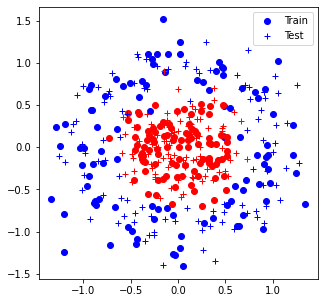

Iter 0: Acc train 0.5% (0.70), acc test 0.5% (0.69)


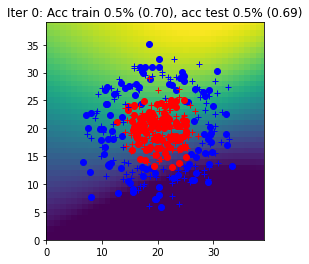

Iter 1: Acc train 0.6% (0.69), acc test 0.5% (0.68)
Iter 2: Acc train 0.6% (0.69), acc test 0.6% (0.68)
Iter 3: Acc train 0.6% (0.68), acc test 0.6% (0.68)
Iter 4: Acc train 0.6% (0.68), acc test 0.6% (0.68)
Iter 5: Acc train 0.6% (0.68), acc test 0.6% (0.67)
Iter 6: Acc train 0.6% (0.68), acc test 0.6% (0.67)
Iter 7: Acc train 0.6% (0.67), acc test 0.6% (0.67)
Iter 8: Acc train 0.6% (0.67), acc test 0.6% (0.67)
Iter 9: Acc train 0.6% (0.67), acc test 0.6% (0.67)
Iter 10: Acc train 0.7% (0.67), acc test 0.6% (0.67)
Iter 11: Acc train 0.6% (0.67), acc test 0.7% (0.66)
Iter 12: Acc train 0.7% (0.66), acc test 0.7% (0.66)
Iter 13: Acc train 0.7% (0.66), acc test 0.7% (0.66)
Iter 14: Acc train 0.7% (0.66), acc test 0.7% (0.66)
Iter 15: Acc train 0.7% (0.66), acc test 0.7% (0.66)
Iter 16: Acc train 0.7% (0.66), acc test 0.7% (0.66)
Iter 17: Acc train 0.7% (0.66), acc test 0.7% (0.65)
Iter 18: Acc train 0.7% (0.65), acc test 0.7% (0.65)
Iter 19: Acc train 0.7% (0.65), acc test 0.7% (0.65)
It

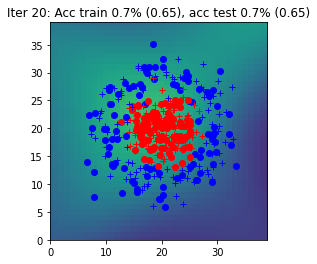

Iter 21: Acc train 0.7% (0.65), acc test 0.7% (0.65)
Iter 22: Acc train 0.7% (0.64), acc test 0.7% (0.64)
Iter 23: Acc train 0.8% (0.64), acc test 0.8% (0.64)
Iter 24: Acc train 0.7% (0.64), acc test 0.8% (0.64)
Iter 25: Acc train 0.8% (0.64), acc test 0.8% (0.64)
Iter 26: Acc train 0.8% (0.63), acc test 0.8% (0.63)
Iter 27: Acc train 0.8% (0.63), acc test 0.8% (0.63)
Iter 28: Acc train 0.8% (0.63), acc test 0.8% (0.63)
Iter 29: Acc train 0.8% (0.62), acc test 0.8% (0.63)
Iter 30: Acc train 0.8% (0.62), acc test 0.9% (0.62)
Iter 31: Acc train 0.8% (0.62), acc test 0.8% (0.62)
Iter 32: Acc train 0.8% (0.61), acc test 0.8% (0.62)
Iter 33: Acc train 0.8% (0.61), acc test 0.9% (0.61)
Iter 34: Acc train 0.9% (0.61), acc test 0.9% (0.61)
Iter 35: Acc train 0.9% (0.60), acc test 0.9% (0.61)
Iter 36: Acc train 0.9% (0.60), acc test 0.9% (0.60)
Iter 37: Acc train 0.9% (0.59), acc test 0.9% (0.60)
Iter 38: Acc train 0.9% (0.59), acc test 0.9% (0.59)
Iter 39: Acc train 0.9% (0.59), acc test 0.9% 

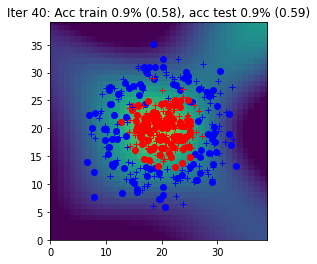

Iter 41: Acc train 0.9% (0.58), acc test 0.9% (0.58)
Iter 42: Acc train 0.9% (0.57), acc test 0.9% (0.58)
Iter 43: Acc train 0.9% (0.57), acc test 0.9% (0.57)
Iter 44: Acc train 0.9% (0.56), acc test 0.9% (0.57)
Iter 45: Acc train 0.9% (0.56), acc test 0.9% (0.56)
Iter 46: Acc train 0.9% (0.55), acc test 0.9% (0.56)
Iter 47: Acc train 0.9% (0.55), acc test 0.9% (0.55)
Iter 48: Acc train 0.9% (0.54), acc test 0.9% (0.55)
Iter 49: Acc train 0.9% (0.54), acc test 0.9% (0.54)
Iter 50: Acc train 0.9% (0.53), acc test 0.9% (0.54)
Iter 51: Acc train 0.9% (0.53), acc test 0.9% (0.53)
Iter 52: Acc train 0.9% (0.52), acc test 0.9% (0.53)
Iter 53: Acc train 0.9% (0.51), acc test 0.9% (0.52)
Iter 54: Acc train 0.9% (0.51), acc test 0.9% (0.52)
Iter 55: Acc train 0.9% (0.50), acc test 0.9% (0.51)
Iter 56: Acc train 0.9% (0.50), acc test 0.9% (0.51)
Iter 57: Acc train 0.9% (0.49), acc test 0.9% (0.50)
Iter 58: Acc train 0.9% (0.49), acc test 0.9% (0.50)
Iter 59: Acc train 0.9% (0.48), acc test 0.9% 

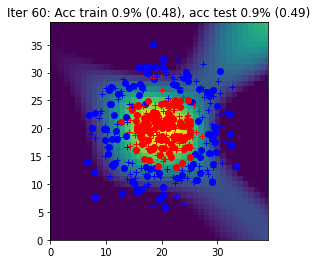

Iter 61: Acc train 1.0% (0.47), acc test 0.9% (0.48)
Iter 62: Acc train 1.0% (0.46), acc test 0.9% (0.48)
Iter 63: Acc train 0.9% (0.46), acc test 0.9% (0.47)
Iter 64: Acc train 0.9% (0.45), acc test 0.9% (0.47)
Iter 65: Acc train 0.9% (0.45), acc test 0.9% (0.46)
Iter 66: Acc train 1.0% (0.44), acc test 0.9% (0.46)
Iter 67: Acc train 1.0% (0.44), acc test 0.9% (0.45)
Iter 68: Acc train 1.0% (0.43), acc test 0.9% (0.45)
Iter 69: Acc train 1.0% (0.43), acc test 0.9% (0.44)
Iter 70: Acc train 1.0% (0.42), acc test 0.9% (0.44)
Iter 71: Acc train 1.0% (0.42), acc test 0.9% (0.43)
Iter 72: Acc train 0.9% (0.41), acc test 0.9% (0.43)
Iter 73: Acc train 1.0% (0.41), acc test 0.9% (0.42)
Iter 74: Acc train 1.0% (0.40), acc test 0.9% (0.42)
Iter 75: Acc train 1.0% (0.40), acc test 0.9% (0.41)
Iter 76: Acc train 1.0% (0.39), acc test 0.9% (0.41)
Iter 77: Acc train 0.9% (0.39), acc test 0.9% (0.40)
Iter 78: Acc train 0.9% (0.38), acc test 0.9% (0.40)
Iter 79: Acc train 1.0% (0.38), acc test 0.9% 

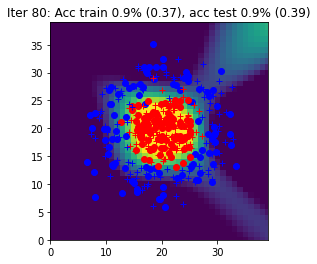

Iter 81: Acc train 0.9% (0.37), acc test 0.9% (0.39)
Iter 82: Acc train 1.0% (0.36), acc test 0.9% (0.38)
Iter 83: Acc train 1.0% (0.36), acc test 0.9% (0.38)
Iter 84: Acc train 1.0% (0.36), acc test 0.9% (0.37)
Iter 85: Acc train 0.9% (0.35), acc test 0.9% (0.37)
Iter 86: Acc train 0.9% (0.35), acc test 0.9% (0.37)
Iter 87: Acc train 0.9% (0.34), acc test 0.9% (0.36)
Iter 88: Acc train 0.9% (0.34), acc test 0.9% (0.36)
Iter 89: Acc train 0.9% (0.34), acc test 0.9% (0.35)
Iter 90: Acc train 0.9% (0.33), acc test 0.9% (0.35)
Iter 91: Acc train 0.9% (0.33), acc test 0.9% (0.35)
Iter 92: Acc train 0.9% (0.32), acc test 0.9% (0.34)
Iter 93: Acc train 0.9% (0.32), acc test 0.9% (0.34)
Iter 94: Acc train 0.9% (0.32), acc test 0.9% (0.34)
Iter 95: Acc train 0.9% (0.31), acc test 0.9% (0.33)
Iter 96: Acc train 0.9% (0.31), acc test 0.9% (0.33)
Iter 97: Acc train 0.9% (0.31), acc test 0.9% (0.33)
Iter 98: Acc train 1.0% (0.30), acc test 0.9% (0.32)
Iter 99: Acc train 0.9% (0.30), acc test 0.9% 

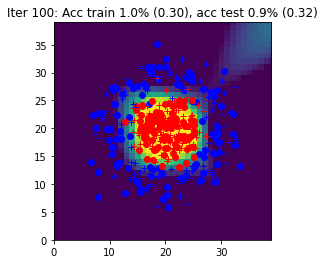

Iter 101: Acc train 0.9% (0.30), acc test 0.9% (0.31)
Iter 102: Acc train 0.9% (0.29), acc test 0.9% (0.31)
Iter 103: Acc train 1.0% (0.29), acc test 0.9% (0.31)
Iter 104: Acc train 0.9% (0.29), acc test 0.9% (0.31)
Iter 105: Acc train 0.9% (0.28), acc test 0.9% (0.30)
Iter 106: Acc train 1.0% (0.28), acc test 0.9% (0.30)
Iter 107: Acc train 0.9% (0.28), acc test 0.9% (0.30)
Iter 108: Acc train 1.0% (0.28), acc test 0.9% (0.30)
Iter 109: Acc train 0.9% (0.27), acc test 0.9% (0.29)
Iter 110: Acc train 1.0% (0.27), acc test 0.9% (0.29)
Iter 111: Acc train 1.0% (0.27), acc test 0.9% (0.29)
Iter 112: Acc train 1.0% (0.27), acc test 0.9% (0.29)
Iter 113: Acc train 1.0% (0.26), acc test 0.9% (0.28)
Iter 114: Acc train 1.0% (0.26), acc test 0.9% (0.28)
Iter 115: Acc train 1.0% (0.26), acc test 0.9% (0.28)
Iter 116: Acc train 1.0% (0.26), acc test 0.9% (0.28)
Iter 117: Acc train 1.0% (0.26), acc test 0.9% (0.28)
Iter 118: Acc train 1.0% (0.25), acc test 0.9% (0.27)
Iter 119: Acc train 1.0% (0.

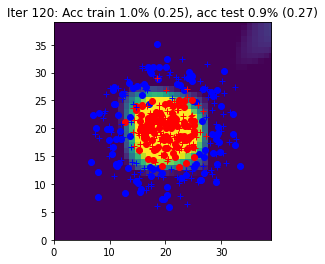

Iter 121: Acc train 0.9% (0.25), acc test 0.9% (0.27)
Iter 122: Acc train 1.0% (0.25), acc test 0.9% (0.27)
Iter 123: Acc train 1.0% (0.24), acc test 0.9% (0.26)
Iter 124: Acc train 1.0% (0.24), acc test 0.9% (0.26)
Iter 125: Acc train 0.9% (0.24), acc test 0.9% (0.26)
Iter 126: Acc train 0.9% (0.24), acc test 0.9% (0.26)
Iter 127: Acc train 0.9% (0.24), acc test 0.9% (0.26)
Iter 128: Acc train 1.0% (0.24), acc test 0.9% (0.26)
Iter 129: Acc train 1.0% (0.23), acc test 0.9% (0.25)
Iter 130: Acc train 1.0% (0.23), acc test 0.9% (0.25)
Iter 131: Acc train 1.0% (0.23), acc test 0.9% (0.25)
Iter 132: Acc train 1.0% (0.23), acc test 0.9% (0.25)
Iter 133: Acc train 1.0% (0.23), acc test 0.9% (0.25)
Iter 134: Acc train 1.0% (0.23), acc test 0.9% (0.25)
Iter 135: Acc train 1.0% (0.22), acc test 0.9% (0.25)
Iter 136: Acc train 1.0% (0.22), acc test 0.9% (0.24)
Iter 137: Acc train 1.0% (0.22), acc test 0.9% (0.24)
Iter 138: Acc train 1.0% (0.22), acc test 0.9% (0.24)
Iter 139: Acc train 1.0% (0.

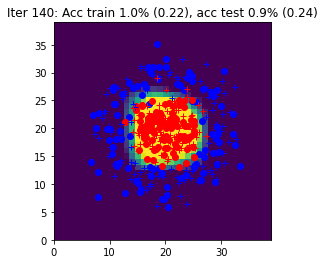

Iter 141: Acc train 1.0% (0.22), acc test 0.9% (0.24)
Iter 142: Acc train 1.0% (0.22), acc test 0.9% (0.24)
Iter 143: Acc train 1.0% (0.21), acc test 0.9% (0.24)
Iter 144: Acc train 1.0% (0.21), acc test 0.9% (0.23)
Iter 145: Acc train 1.0% (0.21), acc test 0.9% (0.23)
Iter 146: Acc train 1.0% (0.21), acc test 0.9% (0.23)
Iter 147: Acc train 1.0% (0.21), acc test 0.9% (0.23)
Iter 148: Acc train 1.0% (0.21), acc test 0.9% (0.23)
Iter 149: Acc train 1.0% (0.21), acc test 0.9% (0.23)


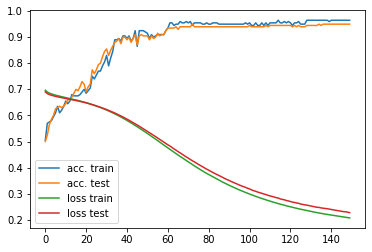

In [298]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant les fonctions loss_accuracy, sgd
        # effectuer le forward en faisant un appel au modèle 
        # calculer les gradients avec la fonction backward de l'autograd 
        Yhat = model(X)
        loss_it, acc = loss_accuracy_2(loss,Yhat,Y)
        loss_it.backward()
        sgd_2(model, eta)
    ####################
    ##      FIN        #
    ####################

    
    Yhat_train = model(data.Xtrain)
    #import ipdb;ipdb.set_trace()
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy_2(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy_2(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    if iteration % 20 == 0:
        data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 4 : Simplification de SGD avec `torch.optim`

In [302]:
def init_model_1(nx, nh, ny, eta):

    #####################
    ## Votre code ici  ##
    #####################

    model = torch.nn.Sequential(
                torch.nn.Linear(nx,nh, bias=True),
                torch.nn.Tanh(),
                torch.nn.Linear(nh,ny, bias=True)
    )
    loss = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(params=model.parameters(),lr=eta)

    ####################
    ##      FIN        #
    ####################

    return model, loss, optim

La fonction `sgd` est supprimée. À la place, on fera un appel à `optim.zero_grad()` avant de faire le backward et à `optim.step()` après le backward. 

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`) + MNIST

Iter 0: Acc train 0.86% (0.52), acc test 0.9% (0.50)
Iter 1: Acc train 0.87% (0.44), acc test 0.9% (0.43)
Iter 2: Acc train 0.88% (0.41), acc test 0.9% (0.39)
Iter 3: Acc train 0.88% (0.40), acc test 0.9% (0.39)
Iter 4: Acc train 0.89% (0.37), acc test 0.9% (0.36)
Iter 5: Acc train 0.89% (0.38), acc test 0.9% (0.37)
Iter 6: Acc train 0.88% (0.40), acc test 0.9% (0.38)
Iter 7: Acc train 0.89% (0.38), acc test 0.9% (0.37)
Iter 8: Acc train 0.89% (0.36), acc test 0.9% (0.36)
Iter 9: Acc train 0.89% (0.38), acc test 0.9% (0.36)
Iter 10: Acc train 0.88% (0.39), acc test 0.9% (0.38)
Iter 11: Acc train 0.90% (0.36), acc test 0.9% (0.34)
Iter 12: Acc train 0.88% (0.38), acc test 0.9% (0.36)
Iter 13: Acc train 0.89% (0.35), acc test 0.9% (0.34)
Iter 14: Acc train 0.89% (0.35), acc test 0.9% (0.34)
Iter 15: Acc train 0.89% (0.35), acc test 0.9% (0.34)
Iter 16: Acc train 0.90% (0.33), acc test 0.9% (0.34)
Iter 17: Acc train 0.90% (0.34), acc test 0.9% (0.34)
Iter 18: Acc train 0.90% (0.34), acc t

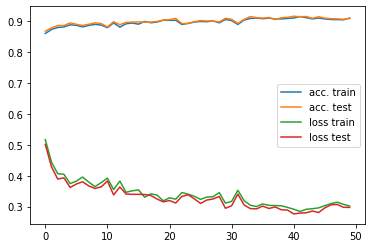

In [306]:
# init
MNIST = True

if MNIST == True:
    data = MNISTData()
    N = data.Xtrain.shape[0]
    Nbatch = 100
    nx = data.Xtrain.shape[1]
    nh = 100
    ny = data.Ytrain.shape[1]
    eta = 0.03
else:
    data = CirclesData()
    data.plot_data()
    N = data.Xtrain.shape[0]
    Nbatch = 10
    nx = data.Xtrain.shape[1]
    nh = 10
    ny = data.Ytrain.shape[1]
    eta = 0.03



model, loss, optim = init_model_1(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(50):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant la fonction loss_accuracy
        # effectuer le forward en faisant un appel au modèle 
        # calculer les gradients avec la fonction backward de l'autograd 
        # Puis une "step" d'optimisation
        Yhat = model(X)
        loss_it, acc = loss_accuracy_2(loss,Yhat,Y)
        loss_it.backward()
        optim.step()
        optim.zero_grad()

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy_2(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy_2(loss, Yhat_test, data.Ytest)
    if MNIST == False:
        Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.2f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 
    if iteration % 20 == 0 and MNIST == False:
        data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 5 : MNIST

Reprendre le code d'entraînement précédent en l'appliquant au dataset MNIST.

# Partie 6: Bonus: SVM


Entrainez un modèle SVM sur le jeu de data Circles.
Le code à remplir est indiqué par des commentaires.


Idées : 
- Essayer d'abord un SVM linéaire (sklearn.svm.LinearSVC dans scikit-learn). Est-ce que cela fonctionne bien ? Pourquoi
- Essayer d'autres kernels (possible avec sklearn.svm.SVC).
Lequel fonctionne le mieux ? Pourquoi ?
- Est-ce que le paramètre C de régularisation à un impact ? Pourquoi ?

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

In [ ]:
import sklearn.svm

############################
### Votre code ici   #######
### Entrainer le SVM #######
## Voir https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## et https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = None

###########################

In [ ]:
## Affichage des résultats

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)